In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special

In [2]:
def relu(x):
    result = np.maximum(0, x)
    return result

def sigmoid(x):
    return 1/(1+np.exp(-x))

# Question 1.3

In [3]:
def ff_nn__ReLu(x, w1, v, b1, c):
    a1 = np.dot(x, w1) + b1
    h1 = relu(a1)
    af = np.dot(h1, v) + c
    y = sigmoid(af)
    return np.array(y)

# Question 1.4

In [4]:
w1 = np.array([[1., 0], [-1., 0], [0, 0.5]]).T
v = np.array([[1., 0, -1.]]).T
b1 = np.array([0, 0, 1])
c = np.array([1.])
x = np.array([[1., 0, 0], [-1., -1, 1.]]).T
ff_nn__ReLu(x, w1, v, b1, c)

array([[0.81757448],
       [0.62245933],
       [0.37754067]])

# Question 2.2

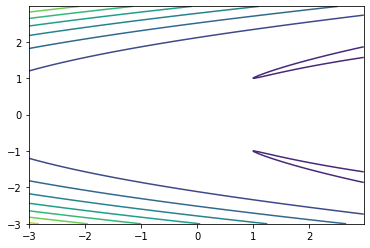

In [5]:
delta = 0.025
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X**3) + 100 * (Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Question 2.3

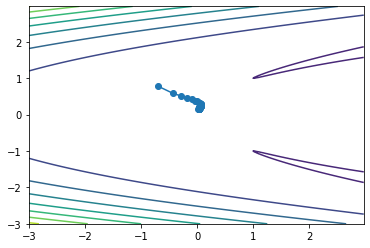

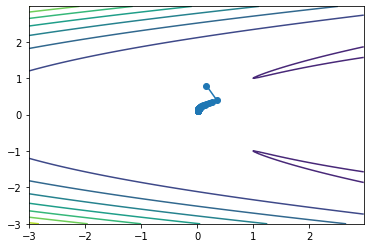

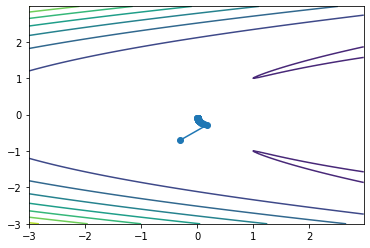

In [6]:
# Gradient Descent

def grad_f(vec):
    x, y = vec
    df_dx = -3 * x**2 - 200 * y**2 + 200 * x
    df_dy = 400 * y**3 - 2 * x * y
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

rate = [0.001, 0.002, 0.003]

np.random.seed(233)

for i in range(len(rate)):
    traj = grad_descent(iterations=50, learning_rate=rate[i])
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x = traj[:,0]
    y = traj[:,1]
    plt.plot(x, y, '-o')

# Question 2.4

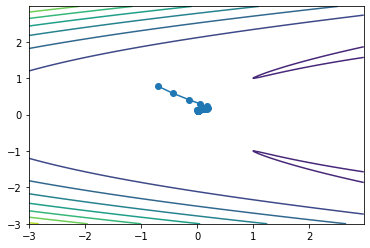

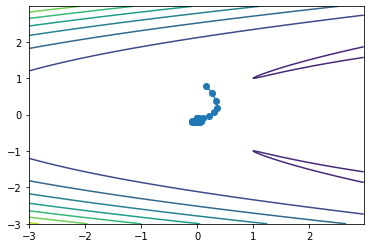

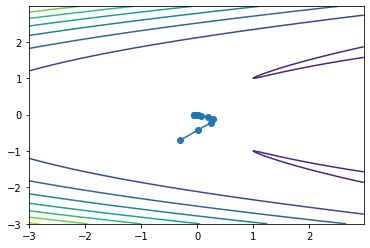

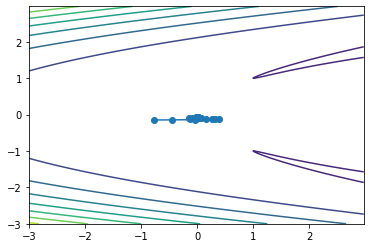

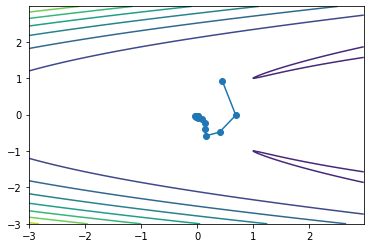

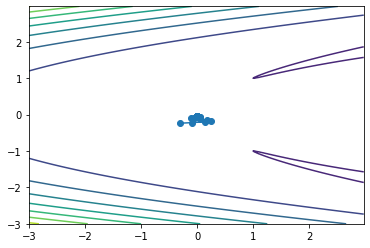

In [7]:
def grad_descent_with_momentum(starting_point=None, iterations=10, epsilon=10, alpha=.9):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

epsilon_vec = [0.001, 0.002, 0.003]
alpha_vec = [0.5, 0.7]

np.random.seed(233)
for i in range(len(epsilon_vec)):
    for j in range(len(alpha_vec)):
        traj = grad_descent_with_momentum(iterations=50, epsilon=epsilon_vec[i], alpha=alpha_vec[j])
        fig, ax = plt.subplots()
        CS = ax.contour(X, Y, Z)
        x = traj[:,0]
        y = traj[:,1]
        plt.plot(x, y, '-o')

In [8]:
def pack_weights(weights):
    w1_11, w1_12, w1_13, w1_21, w1_22, w1_23, b1_1, b1_2, b1_3, v_1, v_2, v_3, c = weights
    W1 = np.array([[w1_11, w1_21], [w1_12, w1_22], [w1_13, w1_23]]).T
    b1 = np.array([b1_1, b1_2, b1_3])
    V = np.array([[v_1, v_2, v_3]]).T
    C = np.array([c])
    return W1, b1, V, C
    
def unpack_weights(W1,b1,V,C):
    w1_11, w1_12, w1_13, w1_21, w1_22, w1_23 = W1[0,0], W1[0,1], W1[0,2], W1[1,0], W1[1,1], W1[1,2]
    b1_1, b1_2, b1_3 = b1[0], b1[1], b1[2]
    v_1, v_2, v_3 = V[0][0], V[1][0], V[2][0]
    c = C[0]
    return np.array([w1_11, w1_12, w1_13, w1_21, w1_22, w1_23, b1_1, b1_2, b1_3, v_1, v_2, v_3, c])

# Question 3.2

In [9]:
def grad_f(weights, x, y):
    
    W1, b1, v, c = pack_weights(weights)
    
    
    a1 = np.dot(x, W1) + b1
    h1 = relu(a1)
    af = np.dot(h1, v) + c
    y_h = sigmoid(af)
    
    
    
    e = -(y-y_h)/(y_h*(1-y_h)+1e-30)
    
    d_c = e.sum(axis=0)
    d_v = h1.T.dot(e)
    d_b1 = (e.dot(v.T) * (h1 > 0)).sum(axis=0)
    
    d_W1 = x.T.dot(e.dot(v.T) * (h1 > 0))
    
    grad_weights = unpack_weights(d_W1, d_b1, d_v, d_c)
    return np.array(grad_weights)

# Question 3.3

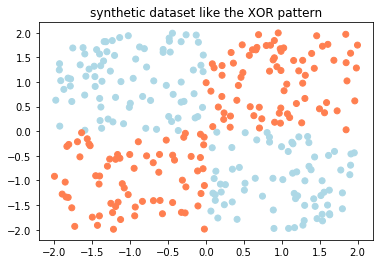

In [10]:
def gen_data(n, plot=False):
    # Fixing seed for repeatability
    np.random.seed(233)
    
    x1=[]
    x2=[]
    y=[]
    
    for i in range(n):
        a = np.random.uniform(-2, 2)
        b = np.random.uniform(-2, 2)
        x1.append(a)
        x2.append(b)
        if a*b>0:
            y.append(0)
        else:
            y.append(1)

    return x1, x2, y

x1, x2, y = gen_data(300)
colormap=np.array(['coral', 'lightblue'])
plt.clf()
plt.scatter(x1, x2, c=colormap[y])
plt.title("synthetic dataset like the XOR pattern")
plt.show()

In [11]:
def loss(y, y_hat):
    #binary cross entropy
    return (-special.xlogy(y, y_hat) - special.xlogy(1 - y, 1 - y_hat)).sum()
    return (-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)).sum()

In [12]:
def y_hat(x, weights):
    w1, b1, v, c = pack_weights(weights)
    return ff_nn__ReLu(x, w1, v, b1, c)

# Question 3.4

In [13]:
def grad_descent(x, y,  iterations, learning_rate):
    weights = np.random.uniform(-.1, .1, size=13).astype("double")
    losses = [loss(y, y_hat(x, weights))]
    
    for i in range(iterations):
        grad = grad_f(weights, x, y)
        weights = weights - learning_rate * grad
        
        losses.append(loss(y, y_hat(x, weights)))
    return weights, losses

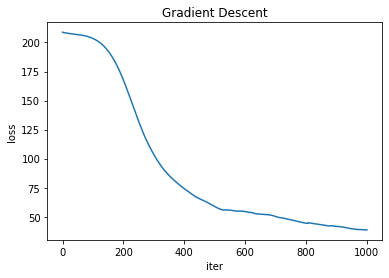

In [14]:
x = np.array([x1, x2]).T
y = np.array(y).reshape(300,1)
weights, losses = grad_descent(x, y, 1000, 0.0001)
plt.title("Gradient Descent")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(losses)

# Question 3.5

In [15]:
def grad_descent_with_momentum(x, y,  iterations=10, epsilon = 0.0001, alpha =0.5):
    weights = np.random.uniform(-.1, .1, size=13).astype("double")
    losses = [loss(y, y_hat(x, weights))]
    vector = np.zeros(weights.size)
    
    for i in range(iterations):
        grad = grad_f(weights, x, y)
        vector = alpha * vector + epsilon * grad
        weights = weights - vector
        losses.append(loss(y, y_hat(x, weights)))
        
    return weights, losses

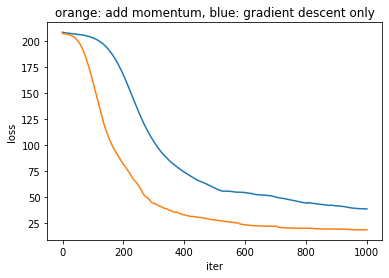

In [16]:
weights, losses2 = grad_descent_with_momentum(x, y, iterations=1000, epsilon = 0.0001, alpha = 0.5)
plt.title("orange: add momentum, blue: gradient descent only")
plt.xlabel("iter")
plt.ylabel("loss")
plt.plot(losses)
plt.plot(losses2)

We can see that Orange lowers faster than Blue. So model with momentum learns faster than without momentum.

# Question 3.6

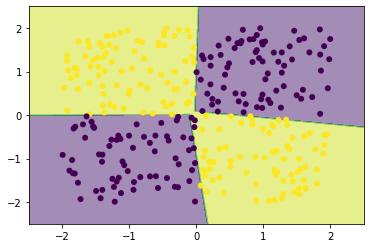

In [17]:
xs = np.linspace(-2.5, 2.5, 1000)
ys = np.linspace(-2.5, 2.5, 1000)
xx, yy = np.meshgrid(xs, ys)
labels = y_hat(np.c_[xx.ravel(), yy.ravel()], weights)
z = labels.reshape(xx.shape)
_, ax = plt.subplots()
ax.contourf(xx, yy, z, alpha=0.5)
ax.scatter(x[:,0],x[:,1], c=y[:,0], lw=0)
plt.show()